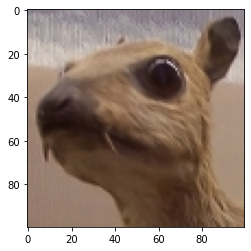

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math
import copy


def convoAndRenderImg(img, kernel):
    dst = cv2.filter2D(img,-1,kernel)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()

img = cv2.imread('./assets/pls.png')
img = img[:,:,::-1]
plt.imshow(img)

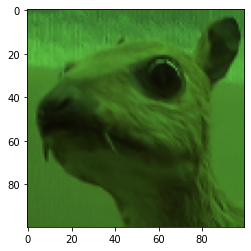

In [2]:
img1 = copy.deepcopy(img)
for i in range(len(img1)):
    for j in range(len(img1[i])):
        img1[i,j] = [img1[i,j,0] * (107 / 255), img1[i,j,1] * (236 / 255), img1[i,j,2] * (85 / 255)]
plt.imshow(img1)

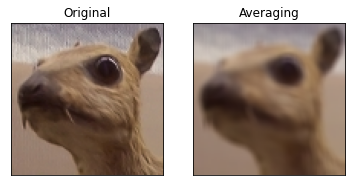

In [3]:
kernel = np.ones((5,5),np.float32)/25
convoAndRenderImg(img, kernel)

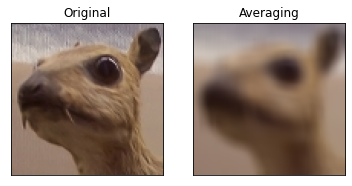

In [4]:
kernel = np.ones((9,9),np.float32)/81
convoAndRenderImg(img, kernel)

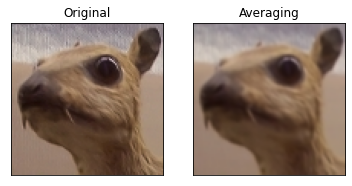

In [5]:
rho = 0.8
def gaussianFunction(x, y):
    return (1 / math.sqrt(2 * math.pi * rho * rho)) * math.pow(math.e, -(x * x + y * y)/ (2 * rho * rho))

gaussianKernel = np.ones((5,5),np.float32)

for i in range(5):
    for j in range(5):
        gaussianKernel[i, j] = gaussianFunction(i - 2, j - 2) / 2

convoAndRenderImg(img, gaussianKernel)

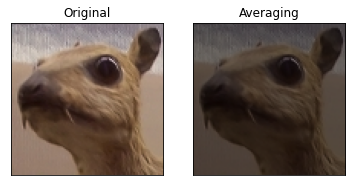

In [6]:
reverseIdentity = np.zeros(25)
reverseIdentity[12] = 0.5
reverseIdentity = reverseIdentity.reshape(5, 5)
convoAndRenderImg(img, reverseIdentity)

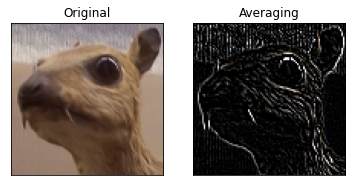

In [7]:
ridge = np.ones(9) * -1
ridge[4] = 8
ridge = ridge.reshape(3, 3)
convoAndRenderImg(img, ridge)

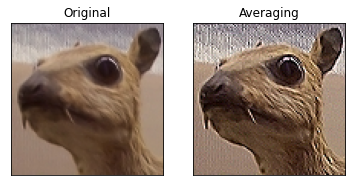

In [8]:
sharpen = np.ones(9) * -1
sharpen[0] = 0
sharpen[2] = 0
sharpen[6] = 0
sharpen[8] = 0
sharpen[4] = 5
sharpen = sharpen.reshape(3, 3)
convoAndRenderImg(img, sharpen)

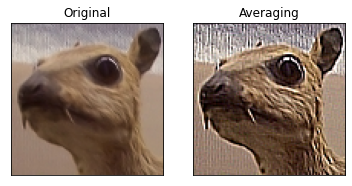

In [9]:
sharpen = np.ones(9) * -1
sharpen[1] = 0
sharpen[3] = 0
sharpen[5] = 0
sharpen[7] = 0
sharpen[4] = 5
sharpen = sharpen.reshape(3, 3)
convoAndRenderImg(img, sharpen)

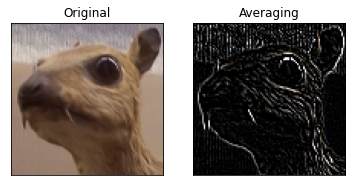

In [10]:
sharpen = np.ones(9) * -1
sharpen[4] = 8
sharpen = sharpen.reshape(3, 3)
convoAndRenderImg(img, sharpen)

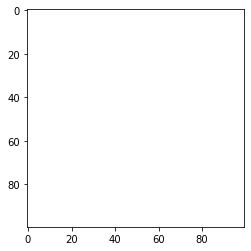

In [11]:
grayscale = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(grayscale, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()